## Initial Data Inspection and data cleaning: For developing a better understanding of the data, one would generally do the following checks: 
### Whether the data has 

- duplicates
- missing values
- irrelevant(erroneous entries) values
- Outliers



In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('rolling_stones_spotify.csv', index_col = 0)

In [3]:
data.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


#### Missing Values

In [5]:
data.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

#### Duplicates

In [6]:
data.duplicated(['id']).sum()

0

#### Conversion of date column to datetime type

In [7]:
data.release_date = pd.to_datetime(data.release_date)

#### Check for count of unique values in object columns

In [8]:
obj_cols = data.select_dtypes('object').columns
for var in obj_cols:
  print('{} : {} '.format(var, data[var].nunique()))

name : 954 
album : 90 
id : 1610 
uri : 1610 


In [9]:
data.name.unique()

array(['Concert Intro Music - Live', 'Street Fighting Man - Live',
       'Start Me Up - Live', "If You Can't Rock Me - Live",
       'Don’t Stop - Live', 'Monkey Man - Live', 'Angie - Live',
       'Let It Bleed - Live', 'Midnight Rambler - Live',
       'Tumbling Dice - Live', 'Band Introductions - Live',
       'Thru And Thru - Live', 'Happy - Live', 'Gimme Shelter - Live',
       'You Got Me Rocking - Live', "Can't You Hear Me Knocking - Live",
       'Honky Tonk Women - Live', 'Satisfaction - Live',
       "It's Only Rock 'N' Roll - Live",
       'When The Whip Comes Down - Live', 'Brown Sugar - Live',
       'Sympathy For The Devil - Live', 'Jumpin Jack Flash - Live',
       'Honky Tonk Women - Live At The El Mocambo 1977',
       'All Down The Line - Live At The El Mocambo 1977',
       'Hand Of Fate - Live At The El Mocambo 1977',
       'Route 66 - Live At The El Mocambo 1977',
       'Fool To Cry - Live At The El Mocambo 1977',
       'Crazy Mama - Live At The El Mocambo 1977

In [10]:
data.album.unique()

array(['Licked Live In NYC', 'Live At The El Mocambo',
       'Tattoo You (Super Deluxe)', 'Tattoo You', 'A Bigger Bang (Live)',
       'Steel Wheels Live', 'Goats Head Soup (Deluxe)',
       'Bridges To Buenos Aires (Live)', 'Bridges To Bremen (Live)',
       'Honk (Deluxe)', 'Voodoo Lounge Uncut (Live)',
       'From The Vault: No Security - San Jose 1999 (Live)', 'On Air',
       'On Air (Deluxe)', 'Sticky Fingers Live At The Fonda Theatre',
       'Ladies & Gentlemen (Live)', 'Blue & Lonesome',
       'Havana Moon (Live)', 'Totally Stripped - Brixton (Live)',
       'Totally Stripped - Amsterdam (Live)', 'Totally Stripped (Live)',
       'Totally Stripped - Paris (Live)',
       'Live 1965: Music From Charlie Is My Darling (Live From England/1965)',
       'Live At The Checkerboard Lounge', "Some Girls: Live In Texas '78",
       'A Bigger Bang (2009 Re-Mastered)', 'Live Licks',
       'Bridges To Babylon', 'Bridges To Babylon (Remastered)',
       'Stripped', 'Voodoo Lounge (Remas

In [11]:
data.track_number.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [12]:
data.track_number = data.track_number.astype('category')

#### id and uri have only unique values hence can be removed from the data 


In [13]:
new_data = data.drop(columns = ['id', 'uri'])

## Checking for outliers in numerical variables using descriptive stats looking at the difference between the mean and min & max values of variables.

In [14]:
new_data.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [15]:
num_vars = new_data.select_dtypes(include = ['float', 'int']).columns
len(num_vars)

11

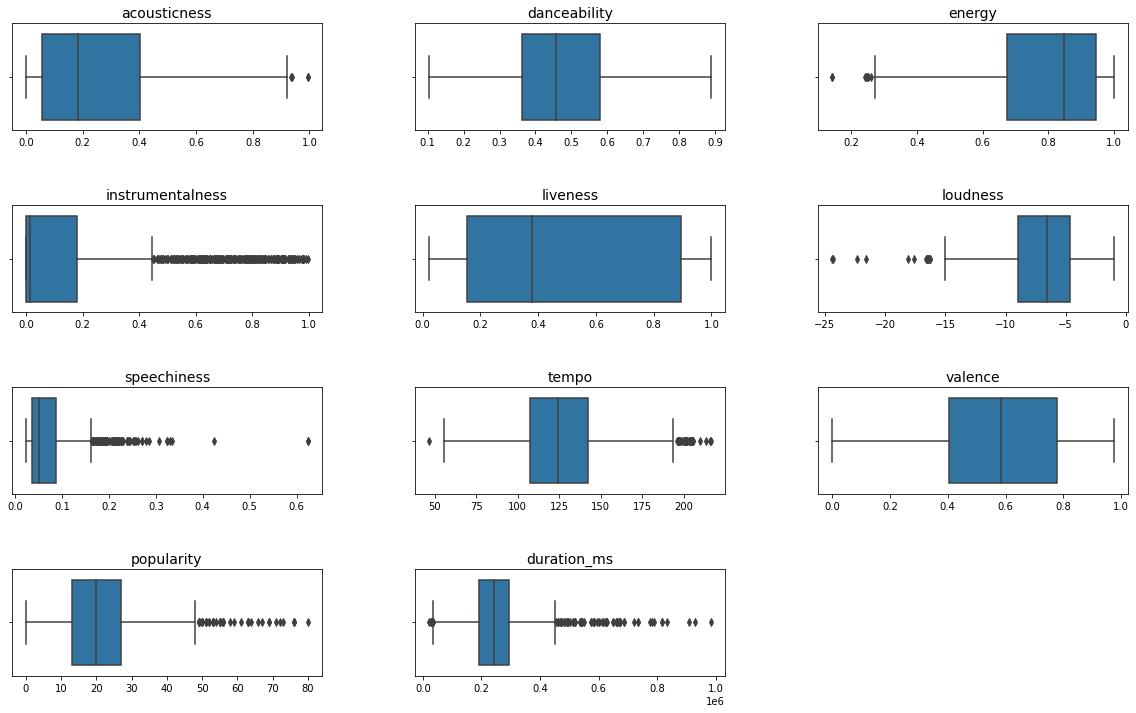

In [16]:
num_vars = new_data.select_dtypes(include = ['float', 'int']).columns
f, ax = plt.subplots(4, 3, figsize = (20,12))
k = 0
for i in range(4):
  for j in range(3):
    # to print nothinng in the last plots as the no. of plots are 11 and cannot be adjusted in a grid
    if len(num_vars) == k:
      ax[i,j].axis("off")
      break
    sns.boxplot(x = num_vars[k], data = new_data, ax = ax[i,j])
    ax[i,j].set_title(num_vars[k], size = 14)
    ax[i,j].set_xlabel('')
    k += 1
    

plt.subplots_adjust(wspace = 0.3, hspace = 0.7)

Outliers in ?

In [17]:
def outlier_check(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3 - q1
  ll = q1 - (1.5* iqr)
  ul = q3 + (1.5* iqr)
  return ll,ul

#### Identify and Cap the outliers at q3 + 1.5 * iqr or q1 - 1.5 * iqr



In [18]:
for var in num_vars:
  ll,ul = outlier_check(new_data[var])
  count = new_data.loc[(new_data[var] < ll) | (new_data[var] > ul)].shape[0]
  print('{} : \nCount = {}\tll : {:.4f}   ul : {:.4f}'.format(var, count, ll, ul))
  new_data.loc[(new_data[var] < ll) , var] = ll
  new_data.loc[(new_data[var] > ul) , var] = ul

acousticness : 
Count = 4	ll : -0.4597   ul : 0.9218
danceability : 
Count = 0	ll : 0.0386   ul : 0.9016
energy : 
Count = 8	ll : 0.2675   ul : 1.3515
instrumentalness : 
Count = 272	ll : -0.2680   ul : 0.4472
liveness : 
Count = 0	ll : -0.9581   ul : 2.0049
loudness : 
Count = 14	ll : -15.5431   ul : 1.9519
speechiness : 
Count = 92	ll : -0.0386   ul : 0.1618
tempo : 
Count = 34	ll : 54.9432   ul : 194.8032
valence : 
Count = 0	ll : -0.1564   ul : 1.3386
popularity : 
Count = 48	ll : -8.0000   ul : 48.0000
duration_ms : 
Count = 76	ll : 33552.8750   ul : 452379.8750


### Check the boxplots again

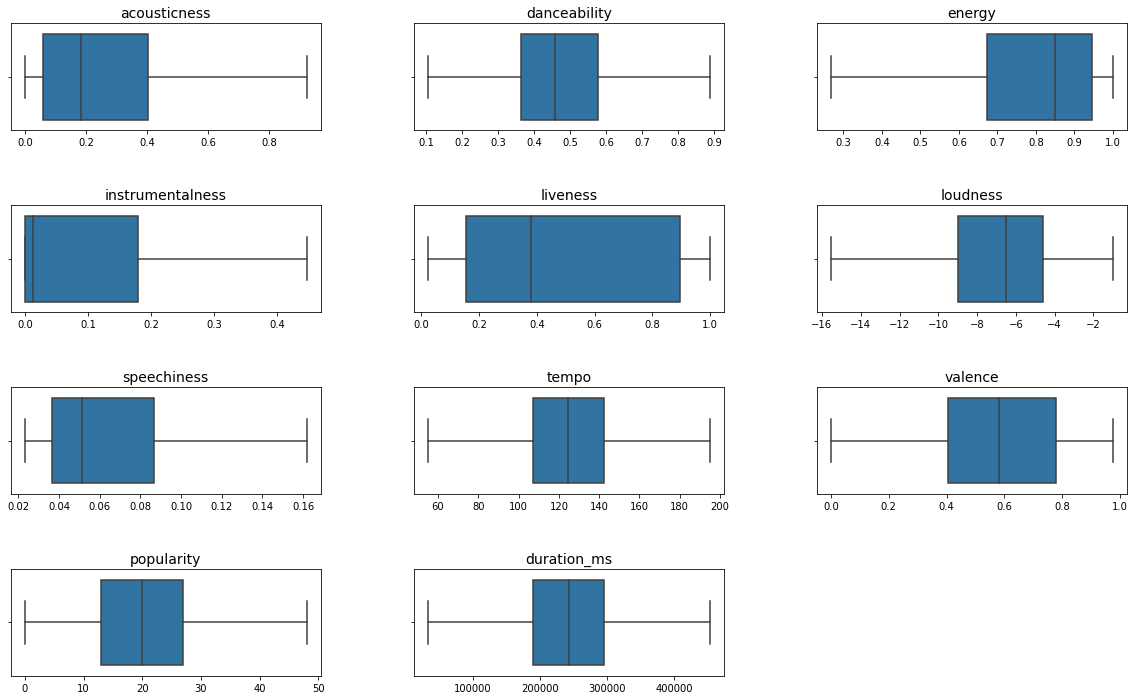

In [20]:
f, ax = plt.subplots(4, 3, figsize = (20,12))
k = 0
for i in range(4):
  for j in range(3):
    if len(num_vars) == k:
      ax[i,j].axis('off')
      break
    sns.boxplot(x = num_vars[k], data = new_data, ax = ax[i,j])
    ax[i,j].set_title(num_vars[k], size = 14)
    ax[i,j].set_xlabel('')
    k += 1
    

plt.subplots_adjust(wspace = 0.3, hspace = 0.7)

In [21]:
new_data['year'] = new_data.release_date.dt.year
new_data['mon'] = new_data.release_date.dt.month

In [22]:
new_data.drop(columns= [ 'release_date'], inplace = True)

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              1610 non-null   object  
 1   album             1610 non-null   object  
 2   track_number      1610 non-null   category
 3   acousticness      1610 non-null   float64 
 4   danceability      1610 non-null   float64 
 5   energy            1610 non-null   float64 
 6   instrumentalness  1610 non-null   float64 
 7   liveness          1610 non-null   float64 
 8   loudness          1610 non-null   float64 
 9   speechiness       1610 non-null   float64 
 10  tempo             1610 non-null   float64 
 11  valence           1610 non-null   float64 
 12  popularity        1610 non-null   float64 
 13  duration_ms       1610 non-null   float64 
 14  year              1610 non-null   int64   
 15  mon               1610 non-null   int64   
dtypes: category(1), float64(

## Which 2 albums would you recommend to anyone based on the number of popular songs in an album? Use necessary visualizations to support your answer.



### top 10 songs

In [24]:
new_data.sort_values('popularity', ascending = False)[['name', 'album', 'popularity']][:10]

,name,album,popularity
724,Love Is Strong,Voodoo Lounge (Remastered 2009),48.0
870,Heaven - Remastered,Tattoo You (2009 Re-Mastered),48.0
1120,Brown Sugar - 2009 Remaster,Sticky Fingers (Remastered),48.0
1022,Doo Doo Doo Doo Doo (Heartbreaker),Goats Head Soup (Remastered 2009),48.0
1023,Angie,Goats Head Soup (Remastered 2009),48.0
671,Anybody Seen My Baby?,Bridges To Babylon,48.0
684,Anybody Seen My Baby? - Remastered,Bridges To Babylon (Remastered),48.0
1095,Happy,Exile On Main Street (Deluxe Version),48.0
1406,Under My Thumb,Aftermath,48.0
1094,Loving Cup,Exile On Main Street (Deluxe Version),48.0


## popularity of an album using avg popularity of the songs

In [25]:
new_data.groupby(['album'])['popularity'].mean().sort_values(ascending = False)[:10]

album
Sticky Fingers (Remastered)                                  46.100000
Some Girls                                                   43.300000
Exile On Main Street (2010 Re-Mastered)                      42.333333
Tattoo You (2009 Re-Mastered)                                42.272727
Beggars Banquet (50th Anniversary Edition)                   40.400000
Aftermath                                                    38.727273
Let It Bleed (50th Anniversary Edition / Remastered 2019)    38.222222
Black And Blue (Remastered 2009)                             37.875000
Goats Head Soup (Remastered 2009)                            37.500000
Out Of Our Heads                                             36.416667
Name: popularity, dtype: float64

### Sticky Fingers (Remastered) and Some Girls are top 2 albums

## What has changed over the years? Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern. Use necessary visualizations to support your points.



In [26]:
import numpy as np

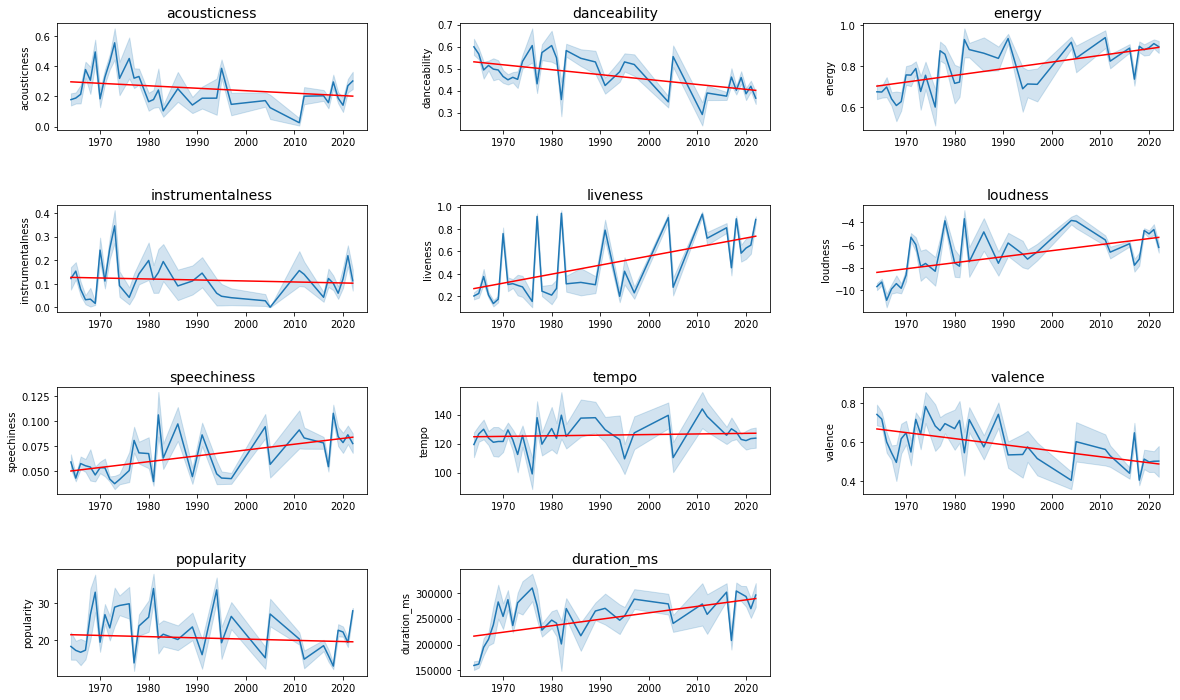

In [27]:
f, ax = plt.subplots(4, 3, figsize = (20,12))
k = 0
for i in range(4):
  for j in range(3):
    if len(num_vars) == k:
      ax[i,j].axis('off')
      break
    sns.lineplot(x = 'year', y = num_vars[k], data = new_data, ax = ax[i,j])
    z = np.polyfit(new_data['year'], new_data[num_vars[k]], 1)
    p = np.poly1d(z)
    ax[i, j].plot(new_data['year'],p(new_data['year']),"r")
    ax[i,j].set_title(num_vars[k], size = 14)
    ax[i,j].set_xlabel('')
    k += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.7)

### an increasing trend in energy liveliness loudness speechiness and duration
### a decreasing trend in valence and danceability 
### others remain more or less constant over the years

# How does the popularity of a song relate to different factors? Has this changed over the years?


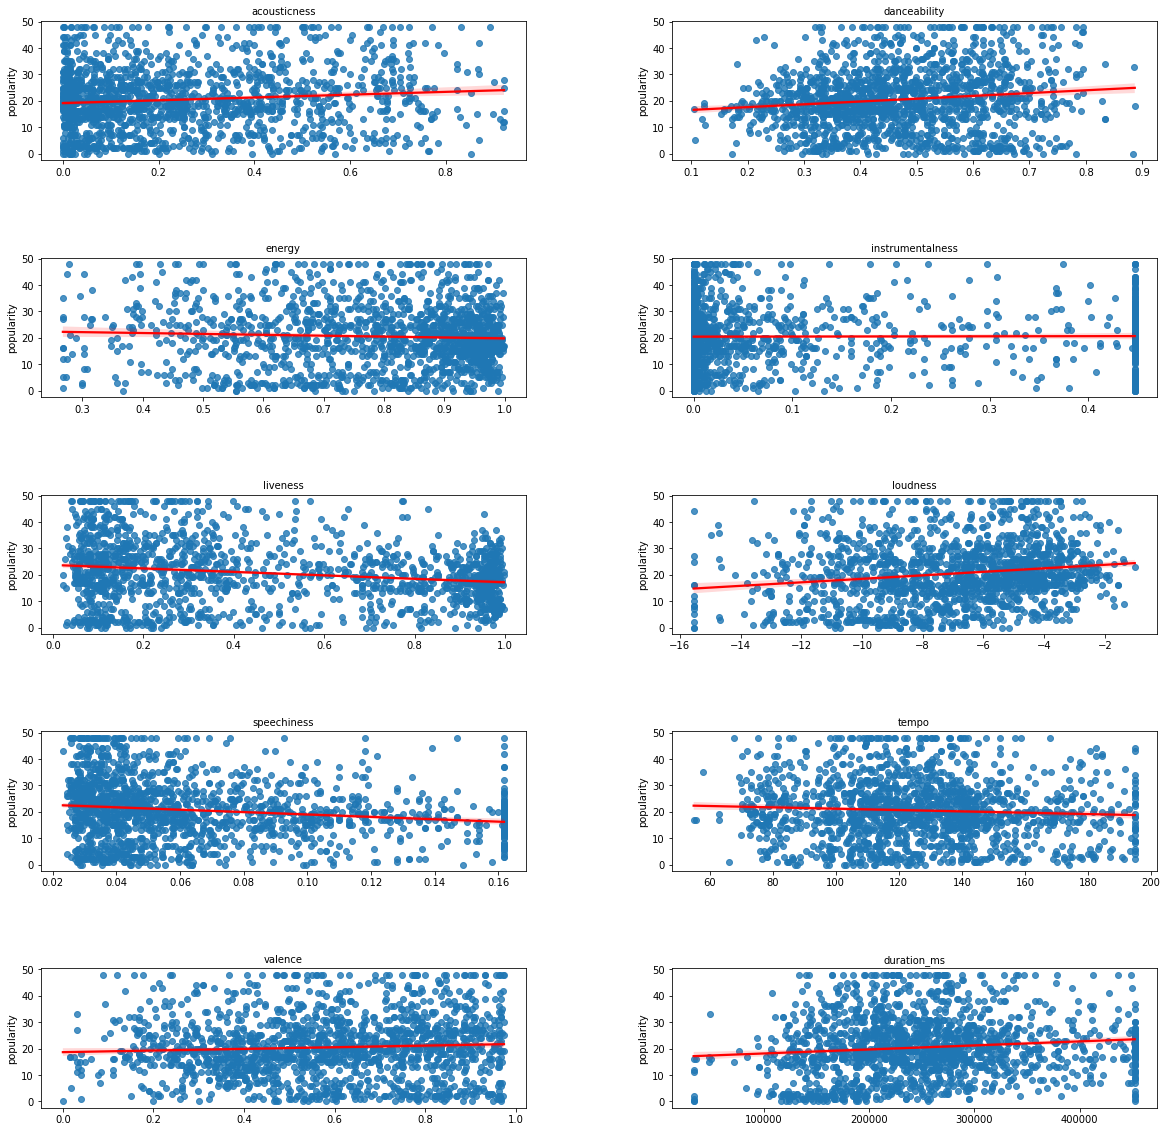

In [28]:
y = 'popularity'
vars = num_vars.drop('popularity')
k = 0
f,ax = plt.subplots(5,2, figsize = (20,20))
for i in range(5):
  for j in range(2):
    sns.regplot(x = vars[k], y = y, data = new_data,ax = ax[i,j], line_kws ={'color':'red'} )
    #sns.lineplot(x = vars[k], y = y, data = new_data,ax = ax[i,j] )
    ax[i,j].set_title(vars[k], size = 10)
    ax[i,j].set_xlabel('')
    k += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)

- No clear realtionship between popularity and sound factors as such.

In [29]:
new_data.year.describe()

count    1610.000000
mean     1991.745963
std        22.440296
min      1964.000000
25%      1970.000000
50%      1986.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

## create groups of data wrt to year with 5 years

In [30]:
new_data['year_class'] = pd.cut(new_data.year, 6, labels = [1,2,3,4,5,6])

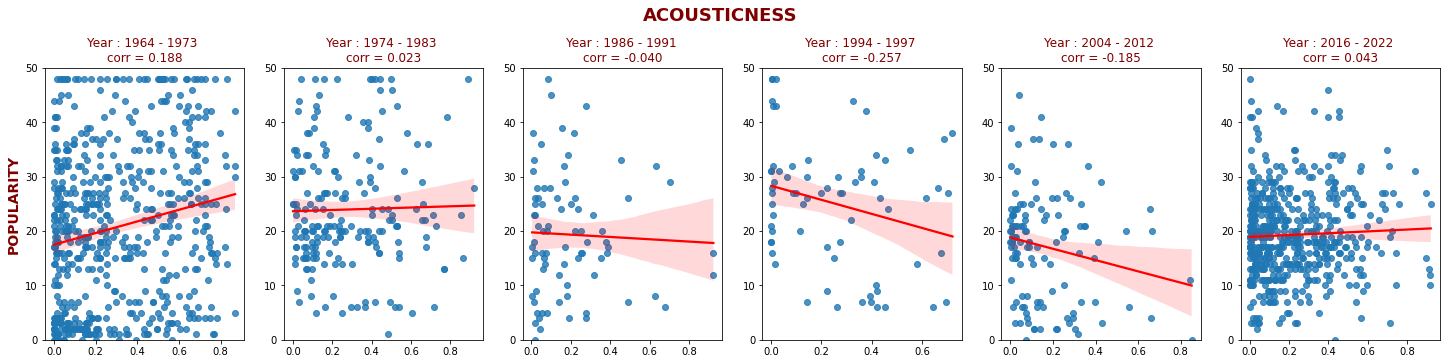

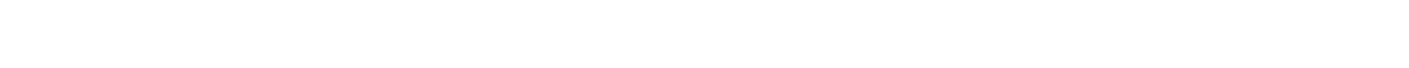

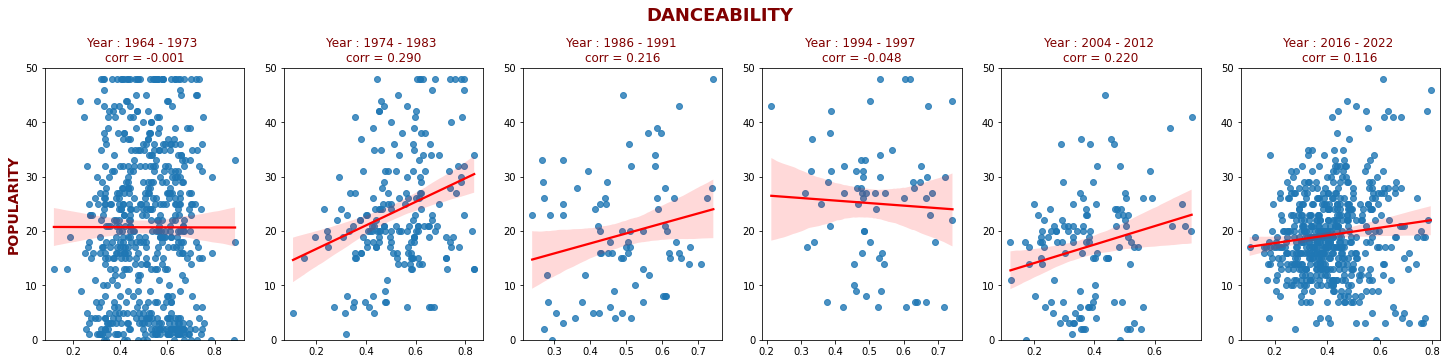

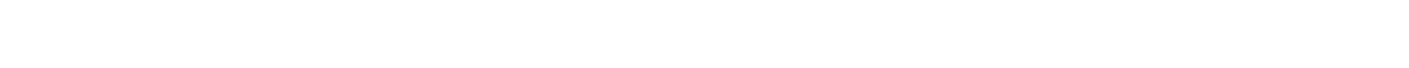

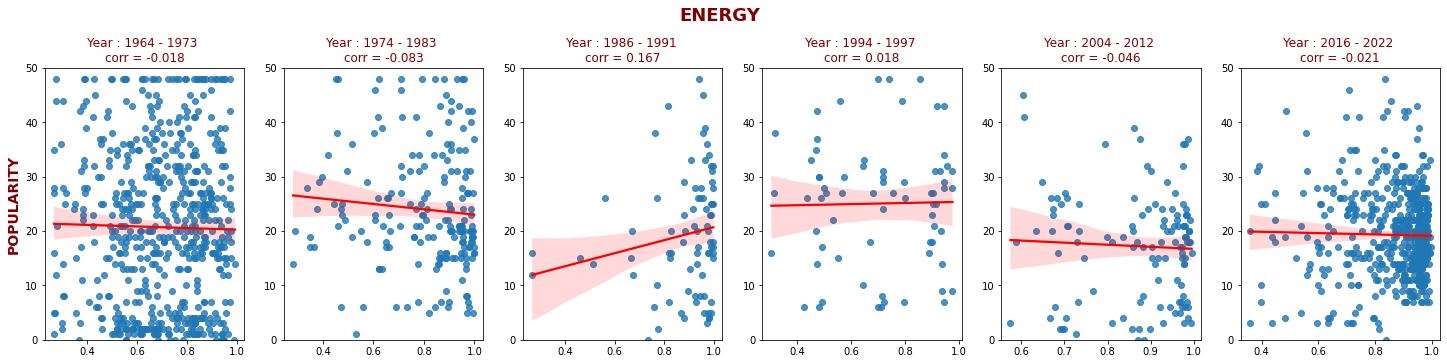

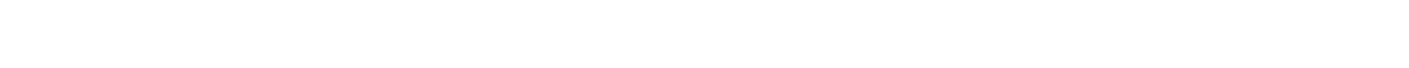

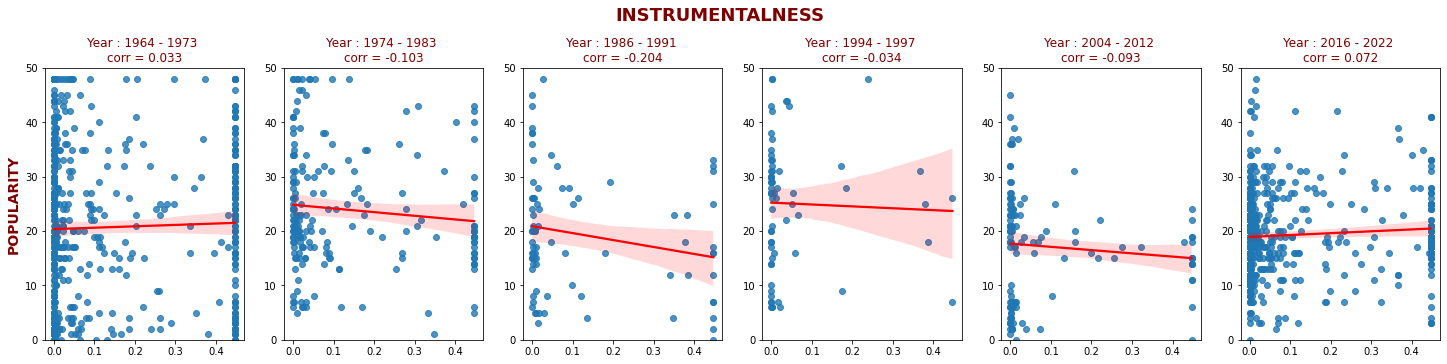

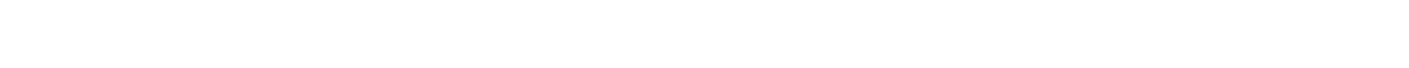

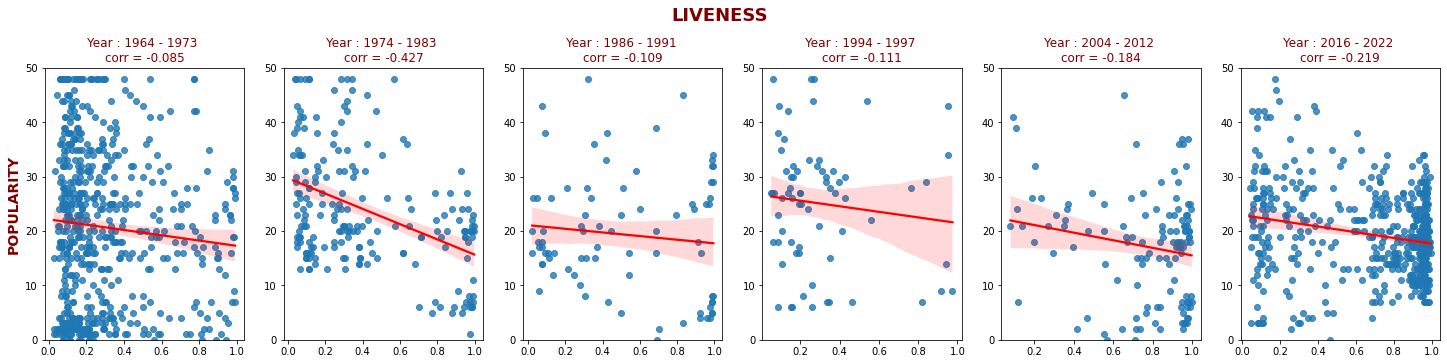

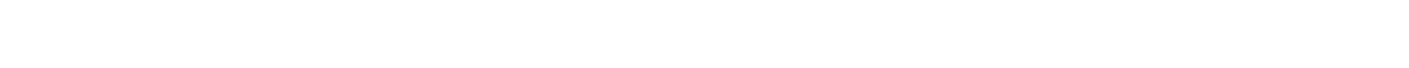

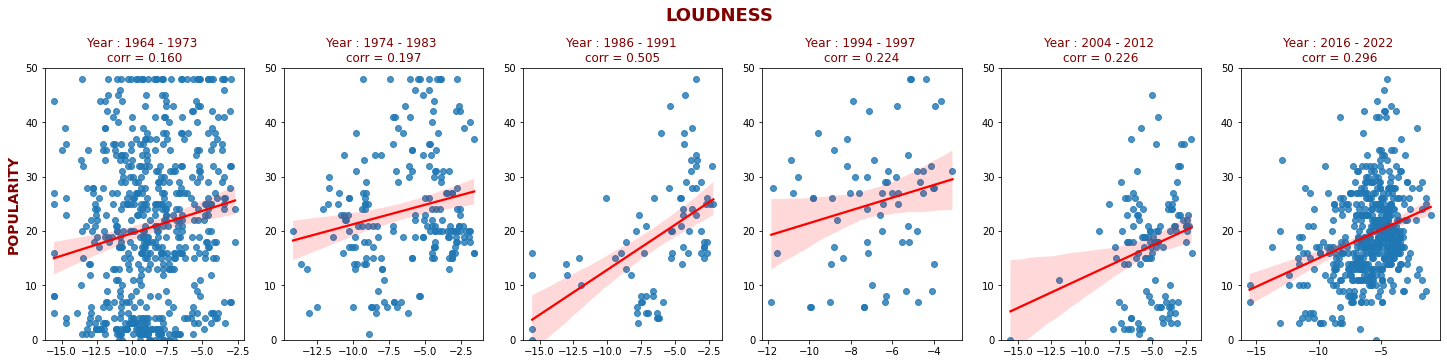

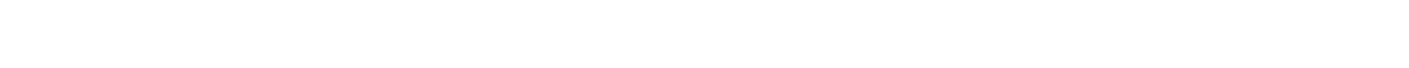

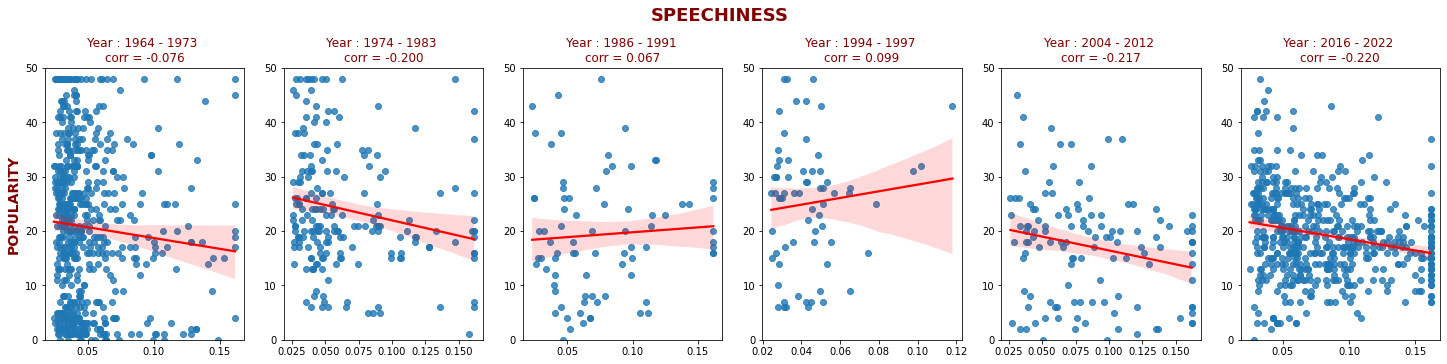

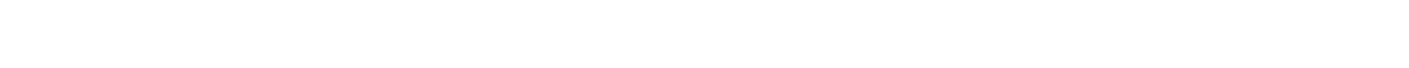

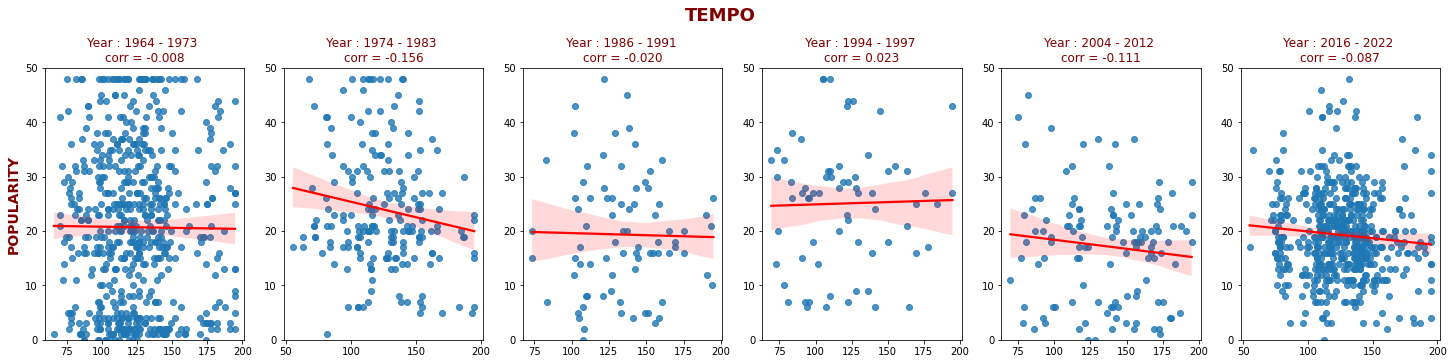

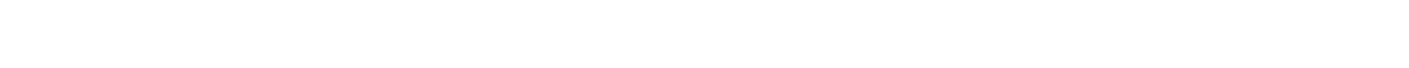

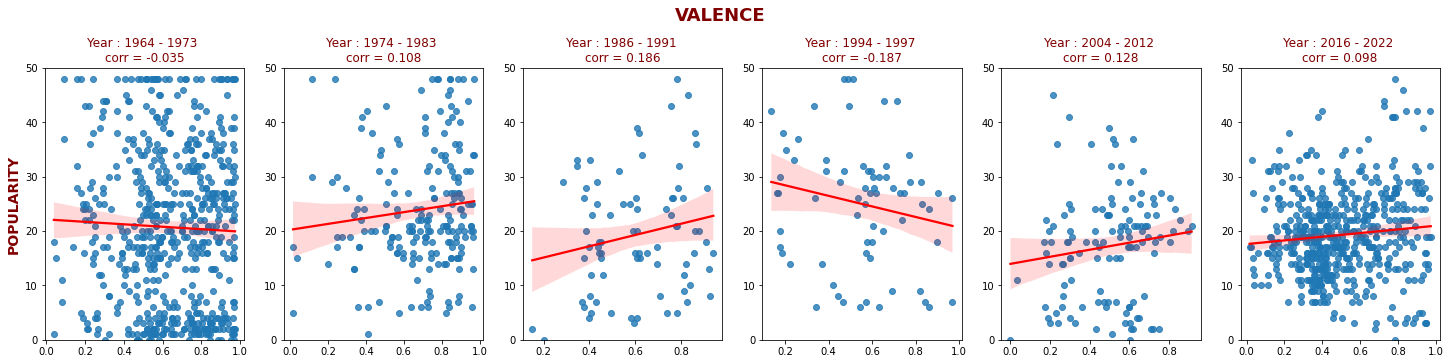

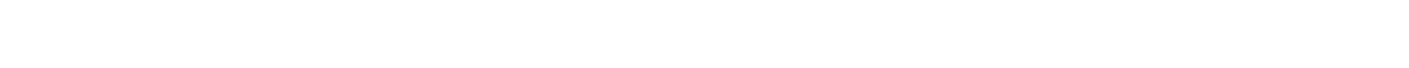

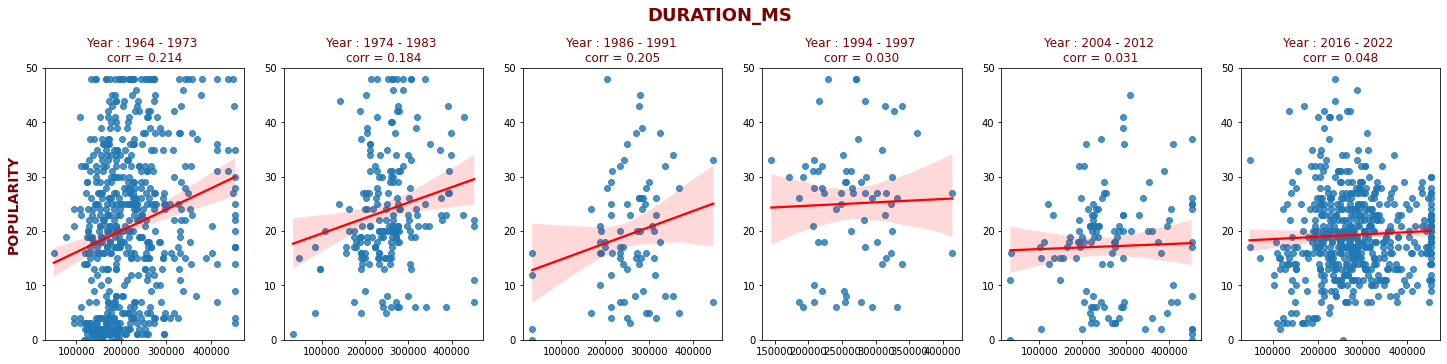

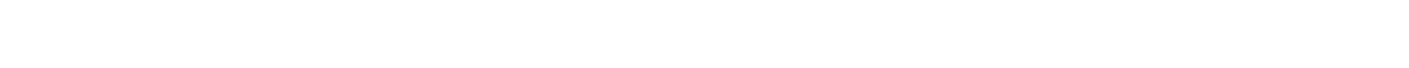

In [31]:
y = 'popularity'
corr_d = {}
vars = num_vars.drop('popularity')
for v in vars:
  i = 0 
  temp_d = []
  f, ax = plt.subplots(1,6, figsize = (25,5))
  for a in range(1,7):
    subdata = new_data.loc[new_data.year_class == a,]
    sns.regplot(x = v , y = y, data = subdata, line_kws ={'color':'red'}, ax = ax[i])
    ax[i].set_ylim(0,50)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.upper(),size = 14,weight = 'bold', color = 'maroon')
    min_year = subdata.year.min()
    max_year = subdata.year.max()
    corr = subdata[v].corr(subdata[y])
    temp_d.append(corr)
    string = 'Year : {} - {} \ncorr = {:.3f}'.format(min_year, max_year, corr)
    ax[i].set_title(string, size = 12, color = 'maroon')
    if  i >= 1:
      ax[i].set_ylabel('')
    i += 1
  plt.suptitle(v.upper(), size = 18, weight = 'bold', color = 'maroon', y = 1.05)
  plt.figure(figsize = (25,1))
  plt.axis('off')
  corr_d.update({v : temp_d})

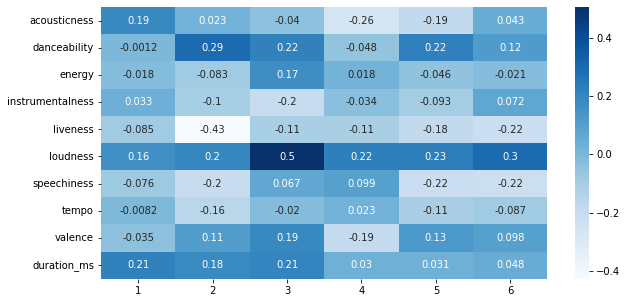

In [32]:
relationship = pd.DataFrame(corr_d, index = range(1,7)).T
plt.figure(figsize = (10,5))
sns.heatmap(relationship, annot = True, cmap = 'Blues')
plt.show()

# Answer: Check for Correlation values across year groups and the trend in them.

## Should we go for dimensionality reduction techniques? share your thoughts and act appropriately.

## Since there are 12 numerical variables we shall go for dimensionality reduction technique.

### PCA : Principal Component Analysis

In [33]:
new_data.loc[:,'acousticness':'duration_ms'].describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,0.250366,0.468860,0.792575,0.115692,0.49173,-6.945452,0.066091,125.922829,0.582165,20.483851,251121.135714
std,0.227061,0.141775,0.179177,0.170448,0.34910,2.890694,0.038636,28.798294,0.231253,11.504048,86189.545637
min,0.000009,0.104000,0.267500,0.000000,0.02190,-15.543125,0.023200,54.943250,0.000000,0.000000,33552.875000
25%,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,0.921850,0.887000,0.999000,0.447171,0.99800,-1.014000,0.161750,194.803250,0.974000,48.000000,452379.875000


In [34]:
sc = StandardScaler()

In [35]:
data_std = sc.fit_transform(new_data.loc[:,'acousticness':'duration_ms'])

In [36]:
cor_mat = np.corrcoef(data_std, rowvar = False)

In [37]:
eig_val, eig_vec = np.linalg.eig(cor_mat)

In [38]:
var_cap = sorted((eig_val / eig_val.sum()) *100, reverse = True)

<BarContainer object of 11 artists>

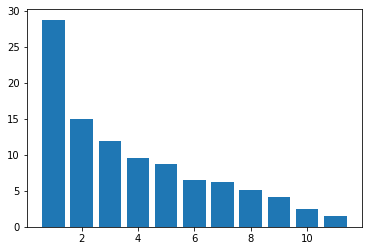

In [39]:
plt.bar(x = range(1,12), height = var_cap)

In [40]:
np.cumsum(var_cap)

array([ 28.80051081,  43.79788811,  55.74659091,  65.24953621,
        73.95501544,  80.50196721,  86.76518148,  91.90686353,
        96.01840241,  98.51330462, 100.        ])

In [41]:
eig_val

array([3.16805619, 1.6497115 , 1.31435731, 0.16353649, 1.04532398,
       0.95760271, 0.27443924, 0.68895357, 0.7201647 , 0.56558503,
       0.45226928])

In [42]:
pca = PCA(n_components = 6)

In [43]:
pca.fit(data_std)

PCA(n_components=6)

In [44]:
pca_data = pca.transform(data_std)

In [45]:
pca_df = pd.DataFrame(pca_data, columns = ['PC{}'.format(i+1) for i in range(6)])

In [46]:
exclude_var = new_data.loc[:,'acousticness':'duration_ms'].columns
obj_cat_data = new_data.loc[:,~new_data.columns.isin(exclude_var)]

In [47]:
final_data = pd.concat([pca_df,obj_cat_data] , axis = 1)
final_data.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,name,album,track_number,year,mon,year_class
0,-0.822186,0.478498,1.668891,2.121928,-0.091167,2.039259,Concert Intro Music - Live,Licked Live In NYC,1,2022,6,6
1,-1.872676,0.509072,-0.895302,1.398785,0.465070,0.359185,Street Fighting Man - Live,Licked Live In NYC,2,2022,6,6


In [48]:
final_data.drop(columns = ['name'], inplace = True)

In [49]:
fd = pd.get_dummies(final_data)

# Perform cluster analysis to create cohorts of songs:

- Identify the right number of clusters
- Use appropriate clustering algorithm
- Define each cluster based on the features



In [50]:
from sklearn.cluster import KMeans

In [ ]:
errors = []
for i in range(1,30):
  kmm = KMeans(n_clusters = i)
  kmm.fit(fd)
  errors.append(kmm.inertia_)

In [ ]:
plt.plot(range(1,30), errors)
plt.scatter(range(1,30), errors)

In [192]:
kmm = KMeans(n_clusters = 3)
kmm.fit(fd)

KMeans(n_clusters=3)

In [193]:
fd['clus_label'] = kmm.labels_

In [194]:
fd.groupby('clus_label').mean()

,PC1,PC2,PC3,PC4,PC5,PC6,year,mon,album_12 X 5,album_12 x 5,...,track_number_44,track_number_45,track_number_46,track_number_47,year_class_1,year_class_2,year_class_3,year_class_4,year_class_5,year_class_6
clus_label,,,,,,,,,,,,,,,,,,,,,
0,0.254433,-0.473971,-0.327991,-0.051564,0.097634,0.161890,1986.469314,6.039711,0.0000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.462094,0.288809,0.249097,0.000000,0.000000
1,-1.142525,0.105601,-0.071319,-0.078741,-0.182343,-0.029058,2016.658209,8.511940,0.0000,0.0000,...,0.001493,0.001493,0.001493,0.001493,0.000000,0.000000,0.000000,0.000000,0.185075,0.814925
2,1.048286,0.091308,0.209106,0.101116,0.143477,-0.038272,1968.775264,6.720965,0.0181,0.0181,...,0.000000,0.000000,0.000000,0.000000,0.891403,0.108597,0.000000,0.000000,0.000000,0.000000


# Cluster Profile

In [196]:
data_new = new_data.drop(columns = 'name')
data_dummy = pd.get_dummies(data_new)
data_dummy.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,...,track_number_44,track_number_45,track_number_46,track_number_47,year_class_1,year_class_2,year_class_3,year_class_4,year_class_5,year_class_6
0,0.0824,0.463,0.993,0.447171,0.932,-12.913,0.11000,118.001,0.0302,33,...,0,0,0,0,0,0,0,0,0,1
1,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.07590,131.455,0.3180,34,...,0,0,0,0,0,0,0,0,0,1
2,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.11500,130.066,0.3130,34,...,0,0,0,0,0,0,0,0,0,1
3,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.16175,132.994,0.1470,32,...,0,0,0,0,0,0,0,0,0,1
4,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.09300,130.533,0.2060,32,...,0,0,0,0,0,0,0,0,0,1


In [197]:
data_dummy_copy = data_dummy.copy()
data_dummy_copy['cluster'] = kmm.labels_
clus_prof_1 = data_dummy_copy.groupby('cluster').mean()
clus_prof_1.insert(loc = 0 , column = 'size', value = data_dummy_copy.groupby('cluster').size() )
clus_prof_1

,size,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,track_number_44,track_number_45,track_number_46,track_number_47,year_class_1,year_class_2,year_class_3,year_class_4,year_class_5,year_class_6
cluster,,,,,,,,,,,,,,,,,,,,,
0,277,0.226459,0.526520,0.811769,0.118651,0.371528,-6.115146,0.063334,126.096322,0.627404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.462094,0.288809,0.249097,0.000000,0.000000
1,670,0.205819,0.407057,0.869590,0.102298,0.705444,-5.771050,0.081653,127.347062,0.499596,...,0.001493,0.001493,0.001493,0.001493,0.000000,0.000000,0.000000,0.000000,0.185075,0.814925
2,663,0.305372,0.507225,0.706727,0.127993,0.325979,-8.479154,0.051515,124.411074,0.646706,...,0.000000,0.000000,0.000000,0.000000,0.891403,0.108597,0.000000,0.000000,0.000000,0.000000


# Alternate : without dimensionality Reduction 


In [198]:
kmm = KMeans(n_clusters = 3)
kmm.fit(data_dummy)

KMeans(n_clusters=3)

In [199]:
data_dummy_copy_2 = data_dummy.copy()
data_dummy_copy_2['cluster'] = kmm.labels_
clus_prof_2 = data_dummy_copy_2.groupby('cluster').mean()
clus_prof_2.insert(loc = 0 , column = 'size', value = data_dummy_copy_2.groupby('cluster').size() )
clus_prof_2

,size,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,track_number_44,track_number_45,track_number_46,track_number_47,year_class_1,year_class_2,year_class_3,year_class_4,year_class_5,year_class_6
cluster,,,,,,,,,,,,,,,,,,,,,
0,749,0.247276,0.461182,0.828579,0.104369,0.539422,-6.131931,0.068647,125.005017,0.565105,...,0.001335,0.001335,0.001335,0.001335,0.252336,0.158879,0.066756,0.062750,0.076101,0.383178
1,625,0.238054,0.502525,0.743494,0.137537,0.364502,-8.111235,0.058388,126.972202,0.650032,...,0.000000,0.000000,0.000000,0.000000,0.568000,0.091200,0.038400,0.027200,0.059200,0.216000
2,236,0.292780,0.404072,0.808288,0.093779,0.677303,-6.440000,0.078378,126.056657,0.456580,...,0.000000,0.000000,0.000000,0.000000,0.199153,0.101695,0.025424,0.021186,0.127119,0.525424


# Visualization

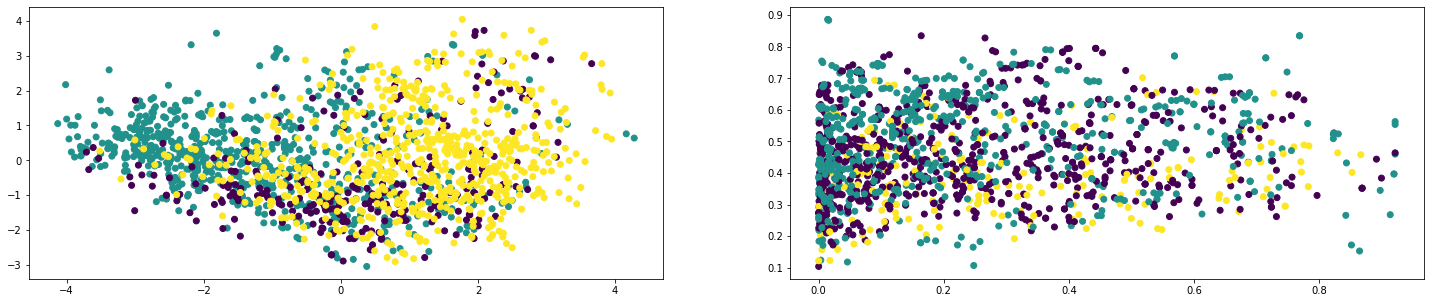

In [208]:
f,ax = plt.subplots(1,2, figsize = (25,5))
# PCA data
ax[0].scatter(x = fd.PC1, y= fd.PC2, c = fd.clus_label)
ax[1].scatter(x = data_dummy_copy_2.acousticness, y= data_dummy_copy_2.danceability, c = data_dummy_copy_2.cluster)
plt.show()